# Handling data

We will analyse the Titanic dataset and go through some of the most important data analysis techniques.

The dataset contains information regarding the passengers of the Titanic, including their demographics, cost of their ticket, where they got on board and whether they survived or not.

**We want to study the impact of demographic and other features on the probability of survival.**

## Setting up the environment

We start by importing the necessary libraries (`pandas` to manipulate data, `matplotlib` and `seaborn` for graphing utilities).

In [1]:
# numpy for algebra
import numpy as np
# pandas for data manipulation
import pandas as pd

# matplotlib an d seaborn for plotting and graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = 16, 3

Seaborn comes with a few famous datasets. We can load the Titanic dataset directly from the library in the form of a `pandas.DataFrame` object.

The dataframe is going to be the most important data structure that we will use in the analysis.

In [3]:
# load the data (it comes bundled with seaborn)
df = sns.load_dataset("titanic")

Some useful methods/attributes to explore a newly loaded dataset include:
 - `head()`
 - `tail()`
 - `info()`
 - `describe()`
 - `shape`
 
#### `shape`
As the name suggests, `shape` returns the dimensions of the dataframe in form of a tuple (# rows, # columns).

In [4]:
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

891 rows x 15 columns


#### `head()`

Head returns the first rows of a dataframe (5 rows by default).

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### `tail()`

Tail returns the last rows of the dataframe (default 5).

In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### `info()`
Info contains summary statistics on the columns of the dataframe (type, non-null entries, and total memory usage of the variable).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#### `describe()`

This method is used to get a summary of numeric values in your dataset. It calculates the mean, standard deviation, minimum value, maximum value, and quartiles of the columns with numeric values. It also counts the number of variables in the dataset. So, we will be able to see if there are missing values in columns.

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## What are the variables?

- survived: Passenger survived(1) or died(0)
- pclass: Passenger class
- name: Passenger's name
- sex: Gender
- age: Age
- sibsp: Siblings/Spouse
- parch: Parents/Children
- fare: Amount of money that has been paid by the passenger
- deck: Cabin Category
- embarked: Ports where passengers embarked

## Counting occurrences of a variable

We are interested in knowing what ratios of men/women, survived/deceased, class ratios, ...

We can use the method `value_counts()` to get the count of unique occurrences of tha data.

In [9]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [10]:
df["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [11]:
df["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [12]:
# if we set normalize to True, we get ratios instead of counts
df["alive"].value_counts(normalize=True).round(3)

no     0.616
yes    0.384
Name: alive, dtype: float64

# Missing data

As we have seen before, there are three features with missing values:
 - age
 - embarked
 - deck

In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [15]:
# df.head()

### Filling  in  missing values

In [18]:
df = df.dropna(subset=["embarked"], axis=0)

In [23]:
df = df.drop("deck", axis=1)

In [ ]:
# substitute with the average
# get distribution of existing ages

In [24]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

c:\users\pietr\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


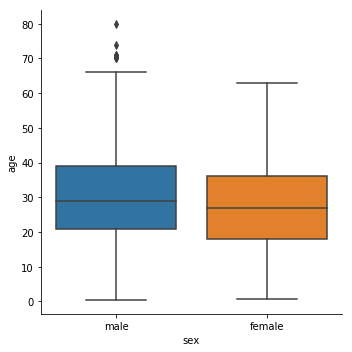

In [25]:
sns.factorplot(x="sex", y="age", data=df, kind="box")
plt.show()

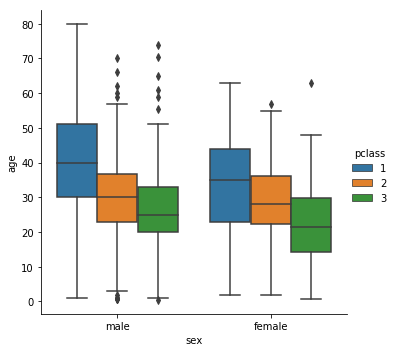

In [27]:
sns.factorplot(x="sex", y="age", hue="pclass", data=df, kind="box")
plt.show()

In [30]:
median = df.age.median()
df["age"] = df["age"].fillna(median)

# Outliers

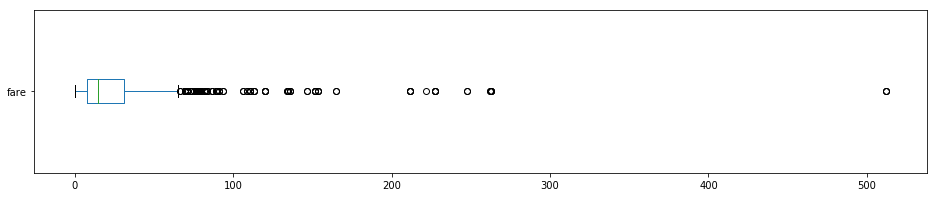

In [32]:
df.fare.plot(kind="box", vert=False)
plt.show()

# Deeper analysis

## Correlations



In [33]:
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]].dropna(axis=0)
df["sex"] = [0 if x == "male" else 1 for x in df.sex]
df["embarked"] = [0 if x == "S" else 1 if x == "C" else 2 for x in df.embarked]

In [34]:
correlations = df.corr()

In [35]:
correlations

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.000000,-0.335549,0.541585,-0.069822,-0.034040,0.083151,0.255290,0.108669
pclass,-0.335549,1.000000,-0.127741,-0.336512,0.081656,0.016824,-0.548193,0.043835
sex,0.541585,-0.127741,1.000000,-0.086506,0.116348,0.247508,0.179958,0.118593
age,-0.069822,-0.336512,-0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.007165
sibsp,-0.034040,0.081656,0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060606
parch,0.083151,0.016824,0.247508,-0.171485,0.414542,1.000000,0.217532,-0.079320
fare,0.255290,-0.548193,0.179958,0.093707,0.160887,0.217532,1.000000,0.063462
embarked,0.108669,0.043835,0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000


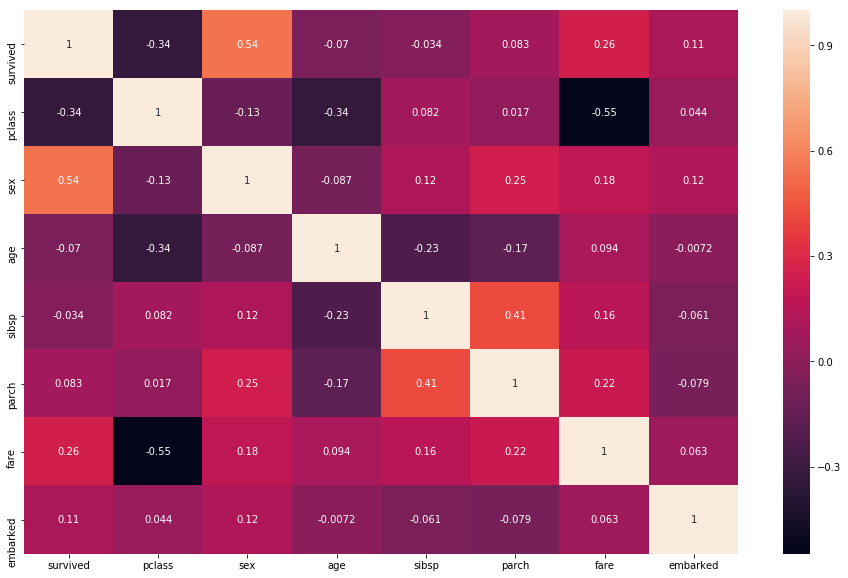

In [37]:
plt.rcParams["figure.figsize"] = 16, 10

sns.heatmap(correlations, annot=True)
plt.show()

## Decomposition and visualization - PCA

Principal Component Analysis (PCA) is a technique used to project a complex data space onto a simpler space while maintaining most of the initial manifold's variance.

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [41]:
pca_values = pca.fit_transform(df.drop("survived", axis=1))

In [43]:
x, y = list(zip(*pca_values))

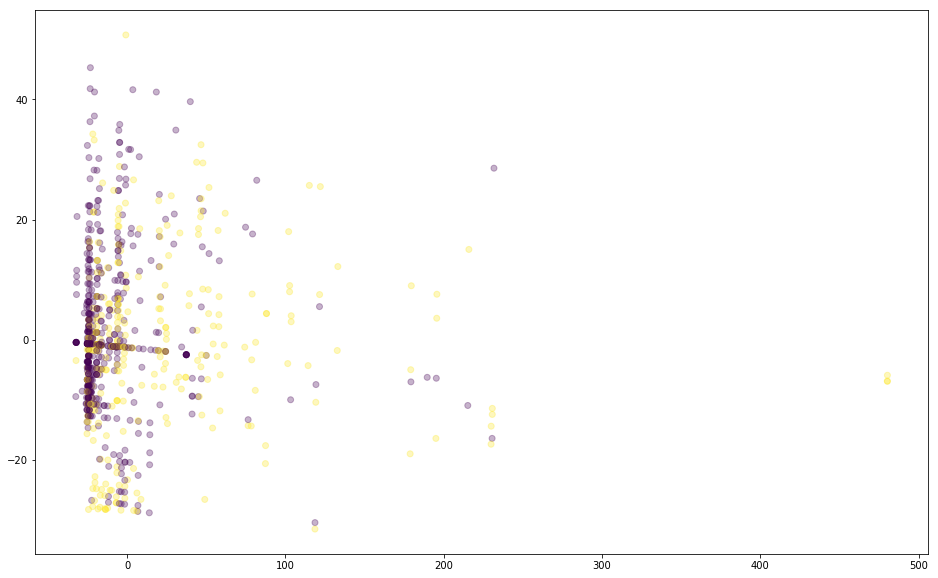

In [45]:
plt.scatter(x, y, c=df.survived, alpha=0.3, cmap="viridis")
plt.show()

In [48]:
list(zip(df.columns[1:], pca.components_[0]))

[('pclass', -0.009237828468344374),
 ('sex', 0.0017220777144969501),
 ('age', 0.026252120298412895),
 ('sibsp', 0.0035355305666220378),
 ('parch', 0.0035095859120112937),
 ('fare', 0.9995984437196237),
 ('embarked', 0.000810738562373121)]

# Normalize features to similar ranges

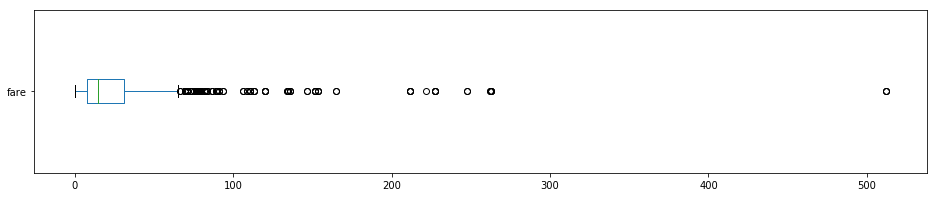

In [49]:
plt.rcParams["figure.figsize"] = 16, 3
df.fare.plot(kind="box", vert=False)

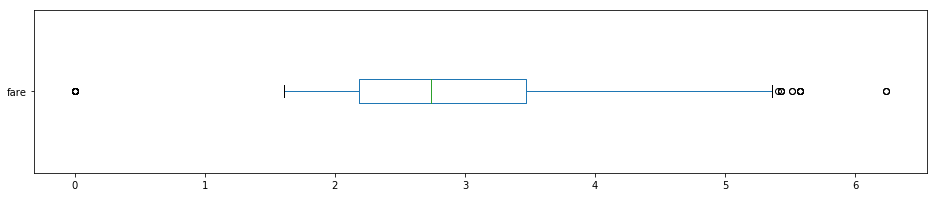

In [50]:
df.fare.apply(np.log1p).plot(kind="box", vert=False)

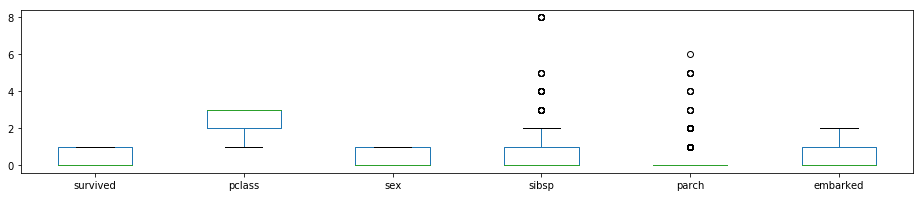

In [53]:
df.drop(["fare", "age"], axis=1).plot(kind="box")
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler


for col in df.columns:
    if col == "survived":
        continue
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

c:\users\pietr\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\pietr\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\pietr\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\pietr\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\pietr\miniconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was conv

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,0.825209,-0.735342,-0.563674,0.431350,-0.474326,-0.500240,-0.569684
1,1,-1.572211,1.359911,0.669217,0.431350,-0.474326,0.788947,1.003139
2,1,0.825209,1.359911,-0.255451,-0.475199,-0.474326,-0.486650,-0.569684
3,1,-1.572211,1.359911,0.438050,0.431350,-0.474326,0.422861,-0.569684
4,0,0.825209,-0.735342,0.438050,-0.475199,-0.474326,-0.484133,-0.569684


In [60]:
pca_values = pca.fit_transform(df.drop("survived", axis=1))

In [61]:
x, y = list(zip(*pca_values))

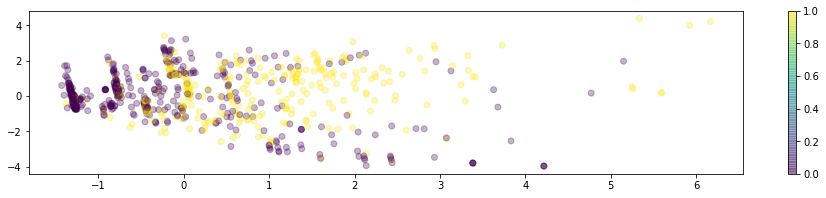

In [63]:
plt.scatter(x, y, c=df.survived, alpha=0.3, cmap="viridis")
plt.colorbar()
plt.show()

## Manifold techniques (optional)

# A Simple classification model

### Logistic regression